### Loading and prerequesites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_fleisch.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_fleisch.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_fleisch.pkl")

### Load dataset

In [3]:
df_sentiment = pd.read_pickle("../Data/df_sentiment.pkl")

In [4]:
# Merge the two dataframes while keeping only the rows that appear in both dataframes and only retaining the columns nexis_id, publication_year, sentiment, positive, neutral, negative, sentences, text_x
df = pd.merge(df, df_sentiment, on="nexis_id", how="inner")
df = df[["nexis_id", "publication_year_y", "text_x", "sentiment", "positive", "neutral", "negative", "sentences"]]

# Rename the column publication_year_y to publication_year
df = df.rename(columns={"publication_year_y": "publication_year"})

# Rename the column text_x to text
df = df.rename(columns={"text_x": "text"})

df.head()

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
0,5SM3THB1DXFJ50MP0000000,2018,Fleisch aus dem Labor ist noch eine Zukunftsvi...,neutral,0.0,43.0,1.0,44.0
1,5SM3THB1DXFJ50MY0000000,2018,Die AP Weltnachrichten haben heute unter ander...,neutral,2.0,39.0,2.0,43.0
2,5STNVWH1DXFJ53VM0000000,2018,Maastricht (AP) - Das niederländische Unterneh...,neutral,0.0,13.0,0.0,13.0
3,5VHK2XG1JB0GF4Y50000000,2019,"Die Weltbevölkerung wächst, die Nachfrage nach...",neutral,0.0,39.0,1.0,40.0
4,5WJBFTV1JB0GF2P80000000,2019,Frisch aus dem Labor: In den USA stellen Start...,neutral,1.0,46.0,1.0,48.0


### General overview

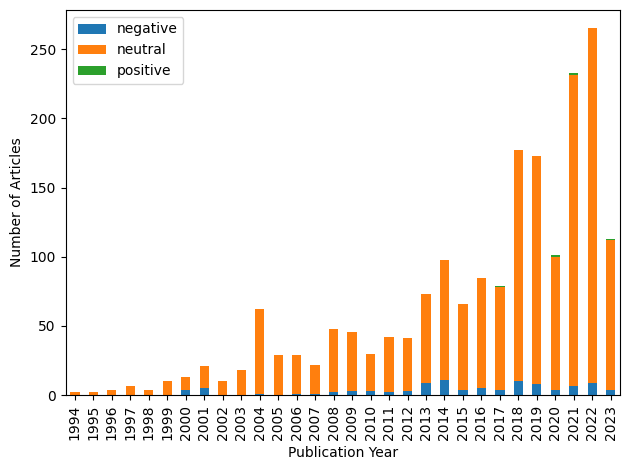

In [5]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_fleisch_per_article_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.004
Model:                                  OLS   Adj. R-squared:                 -0.031
Method:                       Least Squares   F-statistic:                    0.1235
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.728
Time:                              09:58:36   Log-Likelihood:                 38.109
No. Observations:                        30   AIC:                            -72.22
Df Residuals:                            28   BIC:                            -69.42
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

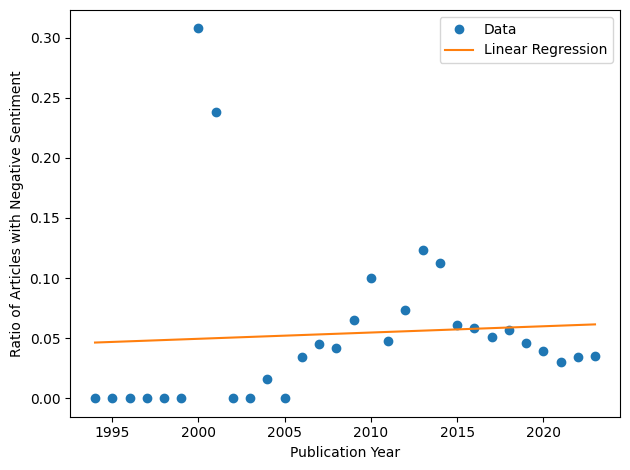

In [6]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_fleisch_articles_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.260
Model:                                  OLS   Adj. R-squared:                  0.234
Method:                       Least Squares   F-statistic:                     9.859
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):            0.00396
Time:                              09:58:36   Log-Likelihood:                 132.04
No. Observations:                        30   AIC:                            -260.1
Df Residuals:                            28   BIC:                            -257.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

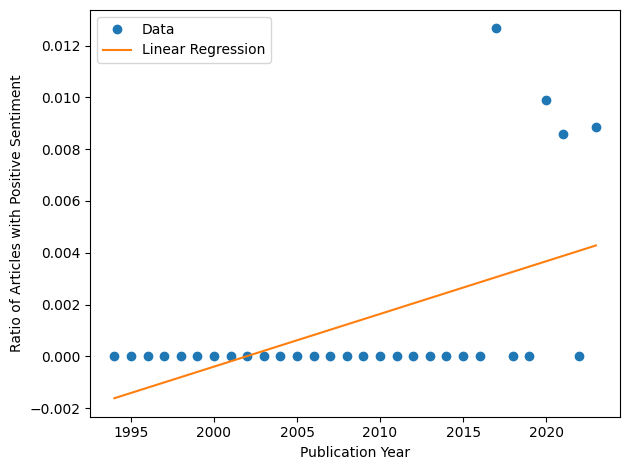

In [7]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_fleisch_articles_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.009
Model:                                 OLS   Adj. R-squared:                 -0.027
Method:                      Least Squares   F-statistic:                    0.2410
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.627
Time:                             09:58:36   Log-Likelihood:                 38.253
No. Observations:                       30   AIC:                            -72.51
Df Residuals:                           28   BIC:                            -69.70
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

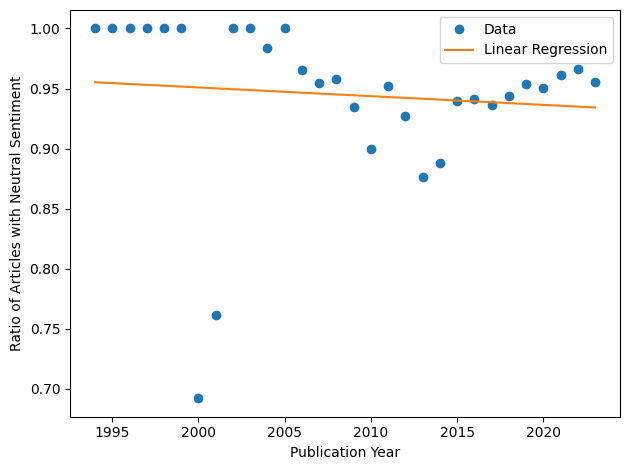

In [8]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_fleisch_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [9]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
189,60YG3FC1DY2BS0NC0000000,2020,Das finde ich super! Leider vergisst man oft d...,positive,3.0,11.0,15.0,29.0
275,67JBGC51JDMNJ06M0000000,2023,Die Zunahme der Weltbevölkerung und geänderte ...,positive,1.0,13.0,0.0,14.0
349,64CGHB91DY69V2HP0000000,2021,"I. Tolkien, ein gläubiger Katholik, leitete se...",positive,14.0,263.0,21.0,298.0
941,5PGBB5S1DYJRP2P70000000,2017,Einige wenige schreckliche Bilder von eingepfe...,positive,2.0,8.0,1.0,11.0
960,63T712K1DY69V4NH0000000,2021,Das ist schon kurios. Da treffen sich Tausende...,positive,0.0,6.0,3.0,9.0


### Further analysis of negative articles

In [10]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
9,5JTVGKD1DXG7T2F00000000,2016,"Es geht um die Frage, welche Sicherheitsanford...",negative,0.0,18.0,0.0,18.0
85,592NS5C1JC3NY02M0000000,2013,Seit Wochenbeginn gibt es aus Stammzellen gezü...,negative,4.0,17.0,9.0,30.0
127,5DPD9CW1DYJRP2H30000000,2014,"Mal zweifelte der eine, mal der andere. Zwar t...",negative,6.0,90.0,10.0,106.0
142,61JHRRV1DY69V4BF0000000,2020,MMeine Tochter ist 18 Jahre alt. Früher habe i...,negative,2.0,25.0,18.0,45.0
167,63VTKHB1DY2BS2240000000,2021,Die Pandemie war ein harter Schlag für das Gas...,negative,13.0,54.0,35.0,102.0
...,...,...,...,...,...,...,...,...
1824,64244MT1JDJ5S01G0000000,2021,Zahl des Tages Ob man nun In-vitro-Fleisch sag...,negative,0.0,5.0,4.0,9.0
1826,64BD8FJ1F117G1NJ0000000,2000,von KATJA NICODEMUS Auf eine bodenständig-prim...,negative,2.0,27.0,1.0,30.0
1848,7XF9MJ90YC41B35W0000000,2009,WAS RICHTIG NERVTE Schweinegrippe Zensur in Ch...,negative,31.0,62.0,34.0,127.0
1852,5942J5N1JDRK84360000000,2013,"Ladies first, natürlich. Ob das in dieser Situ...",negative,1.0,54.0,7.0,62.0


### Analysis per sentence

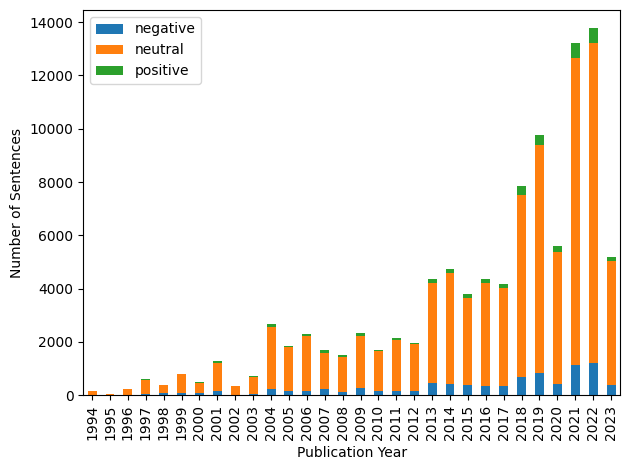

In [11]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_fleisch_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.006
Model:                                  OLS   Adj. R-squared:                 -0.029
Method:                       Least Squares   F-statistic:                    0.1822
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):              0.673
Time:                              09:58:37   Log-Likelihood:                 62.797
No. Observations:                        30   AIC:                            -121.6
Df Residuals:                            28   BIC:                            -118.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

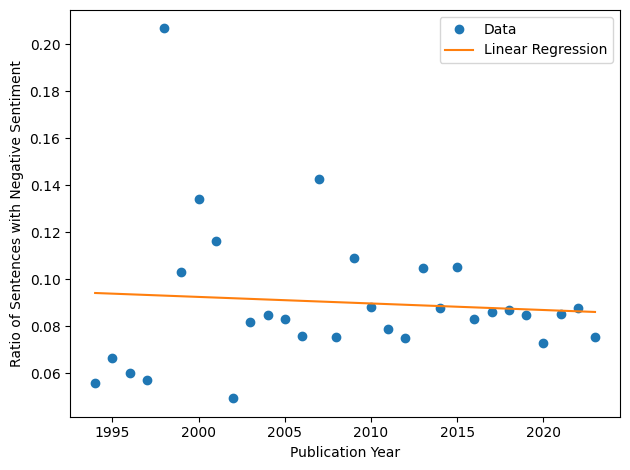

In [12]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_fleisch_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.133
Model:                                  OLS   Adj. R-squared:                  0.102
Method:                       Least Squares   F-statistic:                     4.299
Date:                      Wed, 14 Feb 2024   Prob (F-statistic):             0.0475
Time:                              09:58:37   Log-Likelihood:                 93.357
No. Observations:                        30   AIC:                            -182.7
Df Residuals:                            28   BIC:                            -179.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

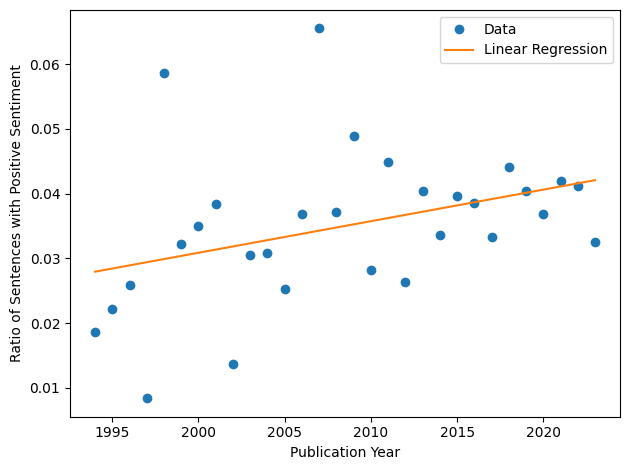

In [13]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_fleisch_sentences_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.034
Method:                      Least Squares   F-statistic:                   0.05984
Date:                     Wed, 14 Feb 2024   Prob (F-statistic):              0.809
Time:                             09:58:37   Log-Likelihood:                 54.574
No. Observations:                       30   AIC:                            -105.1
Df Residuals:                           28   BIC:                            -102.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

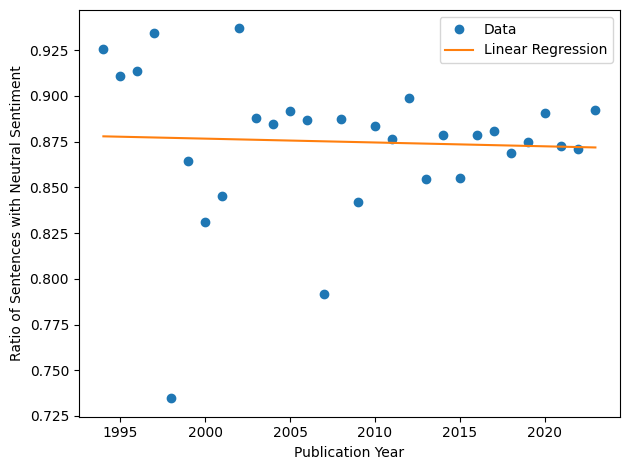

In [14]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_fleisch_sentences_ratio.png')
plt.show()

### Explore anomalies

In [15]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
882,4PYHHPR0TWTB81F20000000,2007,Zusammenfassung Mittels eines überwiegend inte...,neutral,64.0,464.0,64.0,592.0
883,528XMT01JC10031V0000000,2011,1 Einleitung Auf internationaler Ebene waren d...,neutral,55.0,677.0,67.0,799.0
885,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
1410,61VFTR81JCSWK1590000000,2021,"MIRAI FOODS, das einzige Schweizer Clean Meat ...",neutral,44.0,44.0,36.0,124.0
881,4J4WHWW0TWTBC22D0000000,2006,"Sabine Gerlach, Achim Spiller und Christian Wo...",neutral,39.0,772.0,30.0,841.0
179,5RJWH1N1JBK920M10000000,2018,5. JANUAR: Im Schweizer Ort Kölliken kommt Pet...,neutral,37.0,189.0,17.0,243.0
759,5M0CJRN1F07YK0D10000000,2016,BASF Unerwartet gutes Ergebnis BASF überrascht...,neutral,37.0,82.0,31.0,150.0
602,5WCFTGJ1JDPTM1SS0000000,2019,Der alte Machthaber hieß Shogun. Er starb uner...,neutral,33.0,397.0,75.0,505.0
884,5XMWBF71JC1003NP0000000,2019,1 Einleitung Viele gesamtgesellschaftliche The...,neutral,32.0,351.0,45.0,428.0
1848,7XF9MJ90YC41B35W0000000,2009,WAS RICHTIG NERVTE Schweinegrippe Zensur in Ch...,negative,31.0,62.0,34.0,127.0


In [16]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
723,3S3BYJD0004YT4080000000,1998,"Der Meisterkoch aus dem Basler ""Bruderholz"" ue...",neutral,21.0,169.0,76.0,266.0
602,5WCFTGJ1JDPTM1SS0000000,2019,Der alte Machthaber hieß Shogun. Er starb uner...,neutral,33.0,397.0,75.0,505.0
1830,65W8TVG1F117G0H90000000,2022,Interview Juliane Preiß Fotos Miguel Ferraz Ar...,neutral,26.0,118.0,73.0,217.0
885,624438W1DYG1P4NF0000000,2021,1 Einleitung Die Nutztierhaltung ist u.a. geke...,neutral,52.0,520.0,70.0,642.0
883,528XMT01JC10031V0000000,2011,1 Einleitung Auf internationaler Ebene waren d...,neutral,55.0,677.0,67.0,799.0
882,4PYHHPR0TWTB81F20000000,2007,Zusammenfassung Mittels eines überwiegend inte...,neutral,64.0,464.0,64.0,592.0
725,3WX09H80004YT03G0000000,1999,Der Mensch fuerchtet sich vor Dioxin im Poulet...,neutral,11.0,198.0,54.0,263.0
620,66BFH441F15WB2P80000000,2022,"Mein Erweckungserlebnis war, ganz klar, das Co...",neutral,18.0,158.0,52.0,228.0
484,6222TJX1DY2ND3T70000000,2021,Sie sind vor zehn Jahren de facto aus der Öffe...,neutral,12.0,81.0,46.0,139.0
1315,66FVD341DY4BY4M80000000,2022,Ein Samstagvormittag in einem Shoppingcenter i...,neutral,7.0,166.0,46.0,219.0
